In [239]:
from os.path import exists
import requests
from typing import *

from functools import partial

import math
import numpy as np
import scipy as sp
import scipy.stats   # statistics package
import pandas as pd
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# Homework 3: Optimization and Regression, Due October 14, 2022

1. Answer each question.
2. Feel free to leave in testing code and other visualization code.

## Problem 1 (30 pts): A Fully Connected and Single-Layer Neural Network

Suppose we are fitting a regression model to a dataset $(x_i, y_i)_{1 \leq i \leq N}$
\begin{align*}
p(y^i|x^i; A, \mu) & = \mathcal{N}(f(Ax^i + \mu), 1) \\
p(y |x; A, \mu) & = \prod_{i=1}^N p(y^i|x^i; A, \mu)
\end{align*}
where
1. the inputs $x^i \in \mathbb{R}^d$ are d-D vectors
2. $A$ is a $1 \times d$ matrix of weights
$$
A = \begin{pmatrix}
a_{11} & \dots & a_{1d} 
\end{pmatrix}
$$
3. $f: \mathbb{R} \rightarrow \mathbb{R}$ is some function
4. $x$ is a $Nxd$ matrix where row $i$ contains $x^i$
$$
x = \begin{pmatrix}
- & x^1 & -\\
\vdots & \vdots & \vdots\\
- & x^N & -
\end{pmatrix}
$$
5. $y$ is a vector of values to regress against
$$
y = \begin{pmatrix}
y^1 \\
\vdots \\
y^N
\end{pmatrix}
$$
6. $\mu \in \mathbb{R}$ is an offset

### Problem 1a (10 pts)

Implement the conditional density:
$$
p(y |x; A, \mu) = \prod_{i=1}^N p(y^i|x^i; A, \mu)
$$

In [240]:
def model1_density(f: Callable[[float], float],
                   A: np.ndarray,
                   mu: float) -> Callable[[np.ndarray, np.ndarray], float]:
    # Inputs:
    #     f is some function
    #     A is a 1xd matrix
    #     mu is a float indicating the constant offset
    #
    # Outputs:
    #     Return the density as a function of the dataset x and y
    
#     def construct_distribution(theta, x,scale):
#         x = np.concatenate([x, np.ones((3, 1))], axis=1)
#         normals = [
#             sp.stats.norm(loc=np.dot(theta, x[0]), scale=scale),
#             sp.stats.norm(loc=np.dot(theta, x[1]), scale=scale),
#             sp.stats.norm(loc=np.dot(theta,x[2]), scale=scale)
#         ]
#         return normals
# (𝑓(𝐴𝑥𝑖+𝜇),1)
    
    def density(x: np.ndarray, y: np.ndarray) -> float:
        # Inputs:
        #     x is a Nxd matrix where each row is a datapoint
        #
        # Outputs:
        #     y is a length n vector to evaluate the density on
        
        normals = []
        for i in range(x.shape[0]):
            fx = f((A @ x[i]) + mu)
            normals.append(sp.stats.norm(loc=fx,scale=1))
        res = 1
        for i,norm in enumerate(normals):
            res *= norm.pdf(y[i])
        return res
    return density

In [241]:
def f(x):
    return x**2
def grad_f(x):
    return 2*x

A = np.array([2.0, 0.5])
mu = 3.7
x = np.array([[0.57,0.21],[0.22,0.83]])
y = np.array([0.3,0.1])
print(f(np.dot(A,x[0]) + mu))

24.453025000000004


In [242]:
densityFunction = model1_density(f,A,mu)
densityFunction(x,y)

8.834389115133099e-221

### Problem 1b (10 pts)

Derive and implement
$$
\frac{\partial}{\partial A} p(y |x; A, \mu)
$$
and
$$
\frac{\partial}{\partial \mu} p(y |x; A, \mu) \,.
$$

In [243]:
def grad_A(f: Callable[[float], float],
           grad_f: Callable[[float], float],
           A: np.ndarray,
           mu: float,
           x: np.ndarray,
           y: np.ndarray) -> np.ndarray:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A is a 1xd matrix
    #     mu is a float indicating the constant offset
    #.    x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # (𝑓(𝐴𝑥𝑖+𝜇),1)
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. the matrix A, which should be a 1xd matrix.
    
    # y = 𝑓(𝐴𝑥𝑖+𝜇)
    # dy/dA = f(xi)
    res = 0
    # log 
    for i in range(y.shape[0]):
        res += (y[i] * (y[i] - f((A @ x[i]) + mu))*grad_f((A @ x[i]) + mu))*x[i]
    return res 
    
    


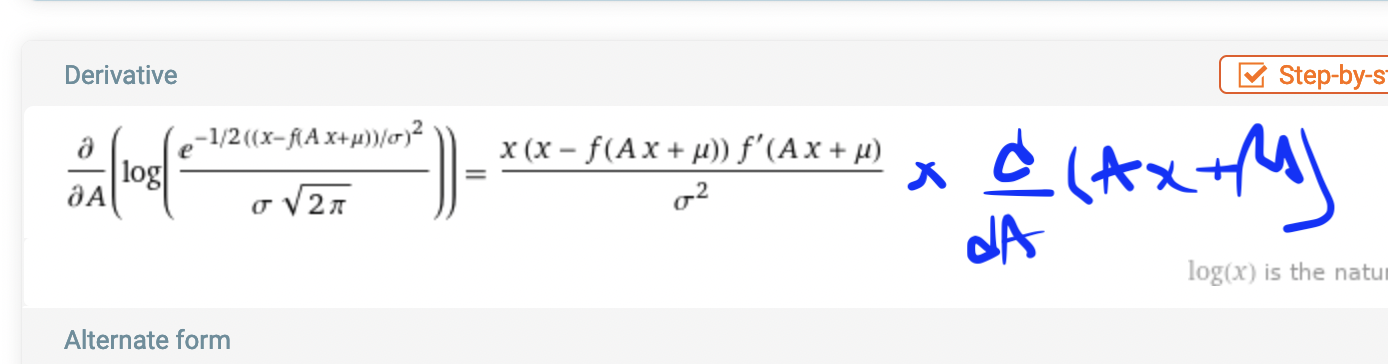

In [244]:
grad_A(f, grad_f, A, mu, x, y)

array([-44.98563152, -30.66161643])

In [245]:
def grad_mu(f: Callable[[float], float],
            grad_f: Callable[[float], float],
            A: np.ndarray,
            mu: float,
            x: np.ndarray,
            y: np.ndarray) -> float:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A is a 1xd matrix
    #     mu is a float indicating the constant offset
    #.    x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. the offset mu, which should be a float.
     # y = 𝑓(𝐴𝑥𝑖+𝜇)
    # dy/dA = f(xi)
    
#     gradient = 0
    
#     fx = f(np.dot(A,x) + mu)
#     normals = []
#     for i in range(x.shape[0]):
#         normals.append(sp.stats.norm(loc=fx[i],scale=1))
#     res = 1
#     for i,norm in enumerate(normals):
#         res *= norm.pdf(y[i])
#     return res
    #log
    res = 0
    for i in range(y.shape[0]): 
        res += (y[i] - f((A @x[i]) + mu))*(grad_f((A @ x[i]) + mu))
    return res
    


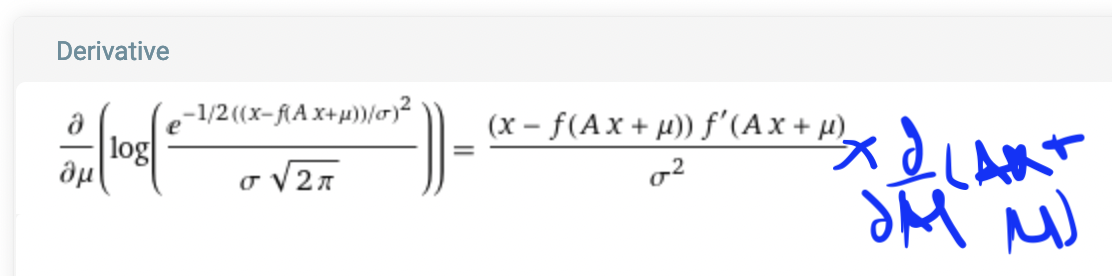

### Problem 1c (10 pts)

Write a function that solves for the weights by finding the approximate minimum of the conditional density, i.e., solve
$$
\operatorname{argmin}_{A, \mu} -p(y | x; A, \mu)
$$
with **stochastic gradient descent**. Hint: you may want to use the negative log-likelihood trick.

We want to minimize the conditional density!

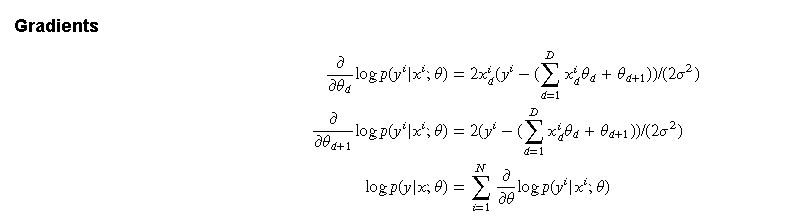

In [246]:

def solve_for_weights(f: Callable[[float], float],
                      grad_f: Callable[[float], float],
                      A: np.ndarray,
                      mu: float,
                      initial_A: np.ndarray,
                      initial_mu: np.ndarray,
                      step_size: float,
                      batch_size: int) -> Tuple[np.ndarray, float]:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A is a 1xd matrix
    #     mu is a float indicating the constant offset
    #     initial_A is a 1xd matrix containing the initial guess of A for stochastic gradient descent
    #     initial_mu is a float containing the initial guess of mu for stochastic gradient descent
    #     step_size is a the step size of stochastic gradient descent
    #     batch_size is the batch size of stochastic gradient descent    
    #
    # Outputs:
    #     Return the density as a function of the dataset x and y
    best_A = np.zeros(A.shape)
    best_mu = 0.
    
#     negLog = -1 * np.log()
    # TODO: fill me in  
    
    def grad_loss(x,y,f,grad_f, A, mu):
        # negative log
        return np.array([-grad_A(f, grad_f, A, mu, x, y), -grad_mu(f, grad_f, A, mu, x, y)],dtype=object)
    
    
    
   
    def grad_desc(x_0, step_size, iterations, batch_size, x, y):
        
        weights = np.array(x_0)
        trajectory = [x_0]
    #     print("trajectory: ", trajectory)
    #     print("x: ", x)
        for i in range(iterations):
            perm = np.random.permutation(len(x))
            shuffled_X = x[perm, :]
            shuffled_Y = y[perm]
            for j in range(0, x.shape[0], batch_size):
                batch_X = shuffled_X[j*batch_size:(j+1)*batch_size,:]
                batch_Y = shuffled_Y[j*batch_size:(j+1)*batch_size]
#                 deriv_f = grad_loss(batch_X,batch_Y,f,grad_f,A1,mu1,A2,mu2)
                deriv_f = partial(grad_loss, batch_X, batch_Y, f, grad_f)
                step = -deriv_f(weights[0],weights[1]) * step_size # move the opposite of the derivative
                weights += step
                trajectory += [np.array(weights)]  # save the trajectory of the points
           
    #         print("+=trajectory: ", trajectory)
    #         print("+=x: ",x)

        return weights, trajectory

    
    
    minima, trajectory = grad_desc(np.array([initial_A, initial_mu]),step_size, 500,batch_size ,x,y)
    best_A = minima[0]
    best_mu = minima[1]
    
    return best_A, best_mu

In [247]:
def f(x):
    return np.cos(x)
def grad_f(x):
    return -np.sin(x)
initial_A = np.zeros(A.shape)
initial_mu = 0.1
step_size = 8e-2
batch_size = 1
x = np.array([[0.1,0.2],[0.7,0.5],[0.2,0.1],[0.9,1.2],[-0.7,0.3]])
y = np.array([1.1,0.1,2.2,0.3,-0.1])
newA, newMu = solve_for_weights(f,grad_f,A,mu,initial_A,initial_mu,step_size,batch_size)

In [248]:


prediction = f(x @ newA.T + newMu)
# print(prediction)
def rmse(predictions, targets):
    return np.sqrt((np.sum(predictions) - np.sum(targets)) ** 2 /predictions.shape[0])

print(rmse(prediction, y))

0.23068526344642293


## Problem 2 (50 pts): A Fully Connected and Two-Layer Neural Network

Suppose we are fitting a regression model to a dataset $(x_i, y_i)_{1 \leq i \leq N}$
\begin{align*}
p(y^i|x^i; A_1, \mu_1, A_2, \mu_2) & = \mathcal{N}(f(A_2 f(A_1x^i + \mu_1) + \mu_2), 1) \\
p(y |x; A_1, \mu_1, A_2, \mu_2) & = \prod_{i=1}^N p(y^i|x^i; A_1, \mu_1, A_2, \mu_2)
\end{align*}
where
1. the inputs $x^i \in \mathbb{R}^d$ are d-D vectors
2. $A_1$ is a $m \times d$ matrix of weights and $A_2$ is a $1 \times m$ matrix of weights.
$$
A = \begin{pmatrix}
a_{11} & \dots & a_{1d} 
\end{pmatrix}
$$
3. $\mu_1 \in \mathbb{R}^m$ is a vector of weights and $\mu_2 \in \mathbb{R}$ is a weight.
4. $f: \mathbb{R} \rightarrow \mathbb{R}$ is some function
5. $x$ is a $Nxd$ matrix where row $i$ contains $x^i$
$$
x = \begin{pmatrix}
- & x^1 & -\\
\vdots & \vdots & \vdots\\
- & x^N & -
\end{pmatrix}
$$
6. $y$ is a vector of values to regress against
$$
y = \begin{pmatrix}
y^1 \\
\vdots \\
y^N
\end{pmatrix}
$$

### Problem 2a (10 pts)

Implement the conditional density:
$$
p(y |x; A_1, \mu_1, A_2, \mu_2) = \prod_{i=1}^N p(y^i|x^i; A_1, \mu_1, A_2, \mu_2)
$$

In [249]:
def model2_density(f: Callable[[float], float],
                   A1: np.ndarray,
                   mu1: float,
                   A2: np.ndarray,
                   mu2: float) -> Callable[[np.ndarray, np.ndarray], float]:
    
    # Inputs:
    #     f is some function
    #     A1 is a mxd matrix
    #     mu1 is a length m vector
    #     A2 is a 1xm matrix
    #     mu2 is a float indicating the constant offset
    #
    # Outputs:
    #     Return the density as a function of the dataset x and y
    def density(x: np.ndarray, y: np.ndarray) -> float:
        # Inputs:
        #     x is a Nxd matrix where each row is a datapoint
        #
        # Outputs:
        #     y is a length n vector to evaluate the density on
        
#         fx = f(np.dot(A,x) + mu)
        normals = []
        for i in range(x.shape[0]):
            inner = f((A1 @ x[i]) + mu1[i])
            fx = f((A2 @ inner) + mu2)
            normals.append(sp.stats.norm(loc=fx,scale=1))
        res = 1
        for i,norm in enumerate(normals):
            res *= norm.pdf(y[i])
        return res
    
    return density

In [250]:
def f(x):
    return x**3
def grad_f(x):
    return 2*x**2
m = 2
d = 2
A1 = np.array([[0.4,1.],[0.3,2.]])
mu1 = np.array([0.,1.])
A2 = np.array([0.2,0.1])
x = np.array([[0.1,0.2],[0.7,0.5]])
y = np.array([1.1,0.1])
mu2 = 0.4
densityFunction = model2_density(f,A1,mu1,A2,mu2)
densityFunction(x,y)

3.271959950623666e-69

### Problem 2b (15 pts)

Derive and implement
$$
\frac{\partial}{\partial A_1} p(y |x; A_1, \mu_1, A_2, \mu_2)
$$
and
$$
\frac{\partial}{\partial \mu_1} p(y |x; A_1, \mu_1, A_2, \mu_2) \,.
$$

In [251]:
def grad_A1(f: Callable[[float], float],
            grad_f: Callable[[float], float],
            A1: np.ndarray,
            mu1: float,
            A2: np.ndarray,
            mu2: float,
            x: np.ndarray,
            y: np.ndarray) -> np.ndarray:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A1 is a mxd matrix of weights
    #     mu1 is a vector of constant offsets
    #     A2 is a 1xm matrix of weights
    #     mu2 is a float that is a constant offset
    #     x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. the matrix A, which should be a 1xd matrix.
    res = 1
    # log 
    for i in range(y.shape[0]):
        leftside = (1/math.sqrt(math.pi*2))*(math.e)**(-((y[i]-(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))))**2)/2)))
        term2 = (y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))
        term3 = ((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))))
        term4 = f((A2 @ f((A @ x[i]) + mu1))) 
        term5 = f((A @ x[i]) + mu1) @ grad_f(x[i])
        term6 = (np.multiply(A2,term2*term3*term4*term5))
        res *= leftside * term6
    return res 
    

In [252]:
grad_A1(f,grad_f,A1,mu1,A2,mu2,x,y)

array([-9.04547905, -2.26136976])

In [253]:
def grad_mu1(f: Callable[[float], float],
            grad_f: Callable[[float], float],
            A1: np.ndarray,
            mu1: float,
            A2: np.ndarray,
            mu2: float,
            x: np.ndarray,
            y: np.ndarray) -> np.ndarray:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A1 is a mxd matrix of weights
    #     mu1 is a vector of constant offsets
    #     A2 is a 1xm matrix of weights
    #     mu2 is a float that is a constant offset
    #     x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. mu1, which should be a 1xd matrix.
   
    res = 1
    # log 
    for i in range(y.shape[0]):
        leftside = (1/math.sqrt(math.pi*2))*(math.e)**(-((y[i]-(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))))**2)/2)))
        term2 = (y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))
        term3 = grad_f((A2 @ f((A1 @ x[i]) + mu1)) + mu2)
        term4 = A2 @ f((A1 @ x[i]) + mu1)
        term5 = grad_f(1)
        res *= leftside * term2 * term3 * term4 * term5
#         res *= leftside * (np.multiply(A2,(2.)*(y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))*(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))) * f((A2 @ f((A @ x[i]) + mu1))) * f((A @ x[i]) + mu1)) @ grad_f(x[i]))))
    return np.array([res]) 
    
    

In [254]:
grad_mu1(f,grad_f,A1,mu1,A2,mu2,x,y)

array([-1978.85884927])

### Problem 2c (15 pts)

Derive and implement
$$
\frac{\partial}{\partial A_2} p(y |x; A_1, \mu_1, A_2, \mu_2)
$$
and
$$
\frac{\partial}{\partial \mu_2} p(y |x; A_1, \mu_1, A_2, \mu_2) \,.
$$

In [255]:
def grad_A2(f: Callable[[float], float],
            grad_f: Callable[[float], float],
            A1: np.ndarray,
            mu1: float,
            A2: np.ndarray,
            mu2: float,
            x: np.ndarray,
            y: np.ndarray) -> np.ndarray:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A1 is a mxd matrix of weights
    #     mu1 is a vector of constant offsets
    #     A2 is a 1xm matrix of weights
    #     mu2 is a float that is a constant offset
    #     x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. the matrix A, which should be a 1xd matrix.
    res = 1
    # log 
    for i in range(y.shape[0]):
        leftside = (1/math.sqrt(math.pi*2))*(math.e)**(-((y[i]-(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))))**2)/2)))
        term2 = (y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))
        term3 = grad_f((A2 @ f((A1 @ x[i]) + mu1)) + mu2)
        term4 = f((A1 @ x[i]) + mu1)
        res *= leftside * term2 * term3 * term4
#         res *= leftside * (np.multiply(A2,(2.)*(y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))*(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))) * f((A2 @ f((A @ x[i]) + mu1))) * f((A @ x[i]) + mu1)) @ grad_f(x[i]))))
    return res

In [256]:
grad_A2(f,grad_f,A1,mu1,A2,mu2,x,y)

array([-9.3626669e+00, -4.5047114e+04])

In [257]:
def grad_mu2(f: Callable[[float], float],
             grad_f: Callable[[float], float],
             A1: np.ndarray,
             mu1: float,
             A2: np.ndarray,
             mu2: float,
             x: np.ndarray,
             y: np.ndarray) -> float:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A1 is a mxd matrix of weights
    #     mu1 is a vector of constant offsets
    #     A2 is a 1xm matrix of weights
    #     mu2 is a float that is a constant offset
    #     x is a nxd matrix of inputs
    #     y is a length n vector of regression outputs
    #
    # Outputs:
    #     Return the gradient of the conditional density w.r.t. the matrix A, which should be a 1xd matrix.
    res = 1
    # log 
    for i in range(y.shape[0]):
        leftside = (1/math.sqrt(math.pi*2))*(math.e)**(-((y[i]-(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))))**2)/2)))
        term2 = 2*(y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))
        term3 = grad_f((A2 @ f((A1 @ x[i]) + mu1)) + mu2)
        res *= leftside * term2 * term3
#         res *= leftside * (np.multiply(A2,(2.)*(y[i]-f((A2 @ f((A1 @ x[i]) + mu1)) + mu2))*(((f((A2 @ f((A1 @ x[i]) + mu1) + mu2))) * f((A2 @ f((A @ x[i]) + mu1))) * f((A @ x[i]) + mu1)) @ grad_f(x[i]))))
    return res

In [258]:
grad_mu2(f,grad_f,A1,mu1,A2,mu2,x,y)

-5708.763222100209

### Problem 2d (10 pts)

Write a function that solves for the weights by finding the approximate minimum of the conditional density, i.e., solve
$$
\operatorname{argmin}_{A_1, \mu_1, A_2, \mu_2} -p(y | x; A_1, \mu_1, A_2, \mu_2)
$$
with **stochastic gradient descent**. Hint: you may want to use the negative log-likelihood trick.

In [318]:
def solve_for_weights(f: Callable[[float], float],
                      grad_f: Callable[[float], float],
                      A1: np.ndarray,
                      mu1: np.ndarray,
                      A2: np.ndarray,
                      mu2: float,
                      initial_A1: np.ndarray,
                      initial_mu1: np.ndarray,
                      initial_A2: np.ndarray,
                      initial_mu2: float,
                      step_size: float,
                      batch_size: int) -> Tuple[np.ndarray, float]:
    # Inputs:
    #     f is some function
    #     grad_f is the gradient of f
    #     A1 is a mxd matrix of weights
    #     mu1 is a vector of constant offsets
    #     A2 is a 1xm matrix of weights
    #     mu2 is a float that is a constant offset
    #     initial_A1 is a mxd matrix containing the initial guess of A1 for stochastic gradient descent
    #     initial_mu1 is a length d vector containing the initial guess of mu1 for stochastic gradient descent
    #     initial_A2 is a 1xm matrix containing the initial guess of A2 for stochastic gradient descent
    #     initial_mu2 is a float containing the initial guess of mu2 for stochastic gradient descent
    #     step_size is a the step size of stochastic gradient descent
    #     batch_size is the batch size of stochastic gradient descent    
    #
    # Outputs:
    #     Return the density as a function of the dataset x and y
    best_A1 = np.zeros(A1.shape)
    best_mu1 = np.zeros(mu1.shape)
    best_A2 = np.zeros(A2.shape)
    best_mu2 = 0.
    
    
    
    
    # TODO: fill me in
    
    def rmse(predictions, targets):
        return np.sqrt((np.sum(predictions) - np.sum(targets)) ** 2 /predictions.shape[0])

    
    
    def grad_loss(x,y,f,grad_f, A1, mu1,A2,mu2):
        return np.array([(grad_A1(f,grad_f,A1,mu1,A2,mu2,x,y)), (grad_mu1(f,grad_f,A1,mu1,A2,mu2,x,y)),(grad_A2(f,grad_f,A1,mu1,A2,mu2,x,y)),(grad_mu2(f,grad_f,A1,mu1,A2,mu2,x,y))],dtype=object)
    
    
    
   
    def grad_desc(x_0, step_size, iterations,x,y):
        
        weights = np.array(x_0)
        print(weights)
        trajectory = [x_0]
    #     print("trajectory: ", trajectory)
    #     print("x: ", x)
        best_loss = 999999
        best_A1 = weights[0]
        best_mu1 = weights[1]
        best_A2 = weights[2]
        best_mu2 = weights[3]
        for i in range(iterations):
            perm = np.random.permutation(len(x))
            shuffled_X = x[perm, :]
            shuffled_Y = y[perm]
            for j in range(0, x.shape[0], batch_size):
                # 3. Create a batch
                
                batch_X = shuffled_X[j*batch_size:(j+1)*batch_size,:]
                batch_Y = shuffled_Y[j*batch_size:(j+1)*batch_size]
#                 deriv_f = grad_loss(batch_X,batch_Y,f,grad_f,A1,mu1,A2,mu2)
                deriv_f = partial(grad_loss, batch_X, batch_Y, f, grad_f)
                step = -deriv_f(weights[0],weights[1],weights[2],weights[3]) * step_size # move the opposite of the derivative
#                 print(step)
#                 print(weights + step)
                weights = weights + step
                print(weights)
#                 print(weights)
#                 weights += step
                trajectory += [np.array(weights)]  # save the trajectory of the points
#             a = ((np.dot(x,  weights[0])) + weights[1])
#             print(weights[0])
#             print(a)
#             print(x)
#             print(weights[0])
#             prediction = f(np.dot(a,newA2) + newmu2)
#             loss = rmse(prediction, y)
#             if loss < best_loss:
#                 best_A1 = weights[0]
#                 best_mu1 = weights[1]
#                 best_A2 = weights[2]
#                 best_mu2 = weights[3]
#                 print("Loss: ", rmse(prediction, y))
            # print(prediction)
#                 print("+=trajectory: ", trajectory)
#         print(step)
    
        return [best_A1,best_mu1,best_A2,best_mu2], trajectory

    
#     fp = partial(grad_loss, x, y,f,grad_f)
#     print(grad_loss(x,y,f,grad_f,A1,mu1,A2,mu2))
    minima, trajectory = grad_desc(np.array([initial_A1, initial_mu1,initial_A2,initial_mu2]),step_size,500,x,y)
    
    best_A1 = minima[0]
    best_mu1 = minima[1]
    best_A2 = minima[2]
    best_mu2 = minima[3]
    return best_A1, best_mu1, best_A2, best_mu2

In [319]:
initial_A1 = np.array([[0.1,0.],[0.1,0.]])
initial_mu1 = np.array([0.,0.])
initial_A2 = np.array([0.1,0.])
initial_mu2 = 1.
batch_size = 1
step_size = 8e-2
x = np.array([[0.1,0.2],[0.7,0.5],[0.2,0.1],[0.9,1.2],[-0.7,0.3]])
y = np.array([1.1,0.1,2.2,0.3,-0.1])
newA1, newmu1, newA2, newmu2 = solve_for_weights(f,grad_f,A1,mu1,A2,mu2,initial_A1,initial_mu1,initial_A2,initial_mu2,step_size,batch_size)

[array([[0.1, 0. ],
        [0.1, 0. ]]) array([0., 0.]) array([0.1, 0. ]) 1.0]
[array([[0.1, 0. ],
        [0.1, 0. ]]) array([-7.00619578e-10, -7.00619578e-10])
 array([ 9.99999965e-02, -3.50309789e-09]) 0.9929938042158903]
[array([[ 1.00101571e-01, -3.55812290e-12],
        [ 1.00101571e-01, -3.55812290e-12]])
 array([-8.31476095e-06, -8.31476095e-06])
 array([ 9.99584262e-02, -4.15738077e-05]) 1.2353862433853364]
[array([[ 1.00101571e-01, -3.55457643e-12],
        [ 1.00101571e-01, -3.55457643e-12]])
 array([-8.34692524e-06, -8.34692524e-06])
 array([ 9.99582652e-02, -4.17347629e-05]) 1.1952197637910822]
[array([[ 1.20568868e-01, -8.54554802e-06],
        [ 1.20568868e-01, -8.54554802e-06]])
 array([3.08259764e-05, 3.08259764e-05]) array([0.10015429, 0.00015429])
 2.3351724059463743]
[array([[1.03676169e+37, 1.59719018e+34],
        [1.03676169e+37, 1.59719018e+34]])
 array([1.37061677e+32, 1.37061677e+32])
 array([6.83200118e+32, 6.83200118e+32]) 1.0688035229299697e+36]
[array([[i

C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in matmul
C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in matmul
C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in matmul
C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in matmul
C:\Users\Yoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul



[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, n

        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, na

        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, na

        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, na

        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, na

        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, nan]]) array([nan, nan]) array([nan, nan]) nan]
[array([[nan, nan],
        [nan, na

[-58.02233243 -58.02233243]
156.75918716697007


### Problem 3 (20 pts): Multi-output Regression

Suppose we are fitting a regression model to a dataset $(x_i, y_i)_{1 \leq i \leq N}$
\begin{align*}
p(y^i|x^i; A, \mu, \Sigma) & = \mathcal{N}(f(Ax^i + \mu), \Sigma) \\
p(y |x; A, \mu, \Sigma) & = \prod_{i=1}^N p(y^i|x^i; A, \mu, \Sigma)
\end{align*}
where
1. the inputs $x^i \in \mathbb{R}^d$ are d-D vectors
2. $A$ is a $2 \times d$ matrix of weights
$$
A = \begin{pmatrix}
a_{11} & \dots & a_{1d} \\
a_{21} & \dots & a_{2d}
\end{pmatrix}
$$
3. $f: \mathbb{R} \rightarrow \mathbb{R}$ is some function
4. $x$ is a $Nxd$ matrix where row $i$ contains $x^i$
$$
x = \begin{pmatrix}
- & x^1 & -\\
\vdots & \vdots & \vdots\\
- & x^N & -
\end{pmatrix}
$$
5. $y$ is a $Nx2$ matrix of values to regress against
$$
y = \begin{pmatrix}
y^1_1 & y^1_2\\
\vdots \\
y^N_1 & y^N_2\\
\end{pmatrix}
$$
6. $\Sigma$ is a covariance matrix
$$
\begin{pmatrix}
\sigma_{11} & \sigma_{12} \\
\sigma_{21} & \sigma_{22}
\end{pmatrix}
$$


### Problem 3a (10 pts)

Suppose we are solving for
$$
\operatorname{argmin}_{A, \mu} -p(y | x; A, \mu, \Sigma) \,.
$$

Derive the associated loss function.

# FILL ME IN

(1/D) * $\sum_{d=1}^{D} \sum_{n=0}^{N-1} (f(A*x + mu) - y_n)^2$ inside text

### Problem 3b (10 pts)

Compare and contrast the situation when $\Sigma$ is an identity matrix and when it is not.

# FILL ME IN
When \epsilon is an identity matrix, the pdf is the sum of square error function